In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from IPython.display import display, Math

from utils import ugly_2d, latex_matrix

In [9]:
# ----------------------------
# Input matrix (example)
# ----------------------------
A = np.array([[1, 5, 3, 4],
              [-7, 10, -4, -2],
              [2, 3, 1, 0]])

A = ugly_2d(nx=50, ny=50,
    sigmax=0.2, sigmay=0.2,
    skew=15.0,
    rotate=np.pi/5,
)

# ----------------------------
# Singular Value Decomposition
# ----------------------------
U, S, Vt = np.linalg.svd(A, full_matrices=False)
Sigma = np.diag(S)
UVt = U @ Vt
K = (np.sum(S**2)**2) / np.sum(S**4) # Schmidt number

# ----------------------------
# Singular vectors
# ----------------------------
u_1, u_2 = U[:, 0], U[:, 1]
v_1, v_2 = Vt[0, :], Vt[1, :]

# ----------------------------
# Reconstruction (exact)
# ----------------------------
A_svd = U @ Sigma @ Vt
err = np.linalg.norm(A - A_svd)

In [10]:
# ----------------------------
# Display matrices
# ----------------------------
display(Math(r"\boldsymbol{A} = " + latex_matrix(A)))
display(Math(r"\boldsymbol{U} = " + latex_matrix(U) + r",\quad \text{columns: } u_1 = " + 
             latex_matrix(u_1.reshape(-1,1)) + r",\; u_2 = " + latex_matrix(u_2.reshape(-1,1))))
display(
    Math(
        r"\boldsymbol{\Sigma} = "
        + latex_matrix(Sigma)
        + r",\quad "
        + r"K = \frac{\left(\sum_i \sigma_i^2\right)^2}{\sum_i \sigma_i^4}"
        + r" = \frac{\big(\mathrm{Tr}\,\boldsymbol{\Sigma}^2\big)^2}"
          r"{\mathrm{Tr}\,\boldsymbol{\Sigma}^4}"
        + r" = {:.3f}".format(K)
    )
)
display(Math(r"\boldsymbol{V^T} = " + latex_matrix(Vt) + r",\quad \text{rows: } v_1 = " + 
             latex_matrix(v_1.reshape(-1,1)) + r",\; v_2 = " + latex_matrix(v_2.reshape(-1,1))))
display(Math(r"\boldsymbol{A}_{\mathrm{svd}} = \boldsymbol{U} \boldsymbol{\Sigma} \boldsymbol{V^T} = " \
            + latex_matrix(A_svd) \
            + r", \quad ||\boldsymbol{A} - \boldsymbol{A}_{\mathrm{svd}}|| = " + "{:.3e}".format(err)))
display(Math(r"\boldsymbol{U} \boldsymbol{V^T} = " + latex_matrix(UVt)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

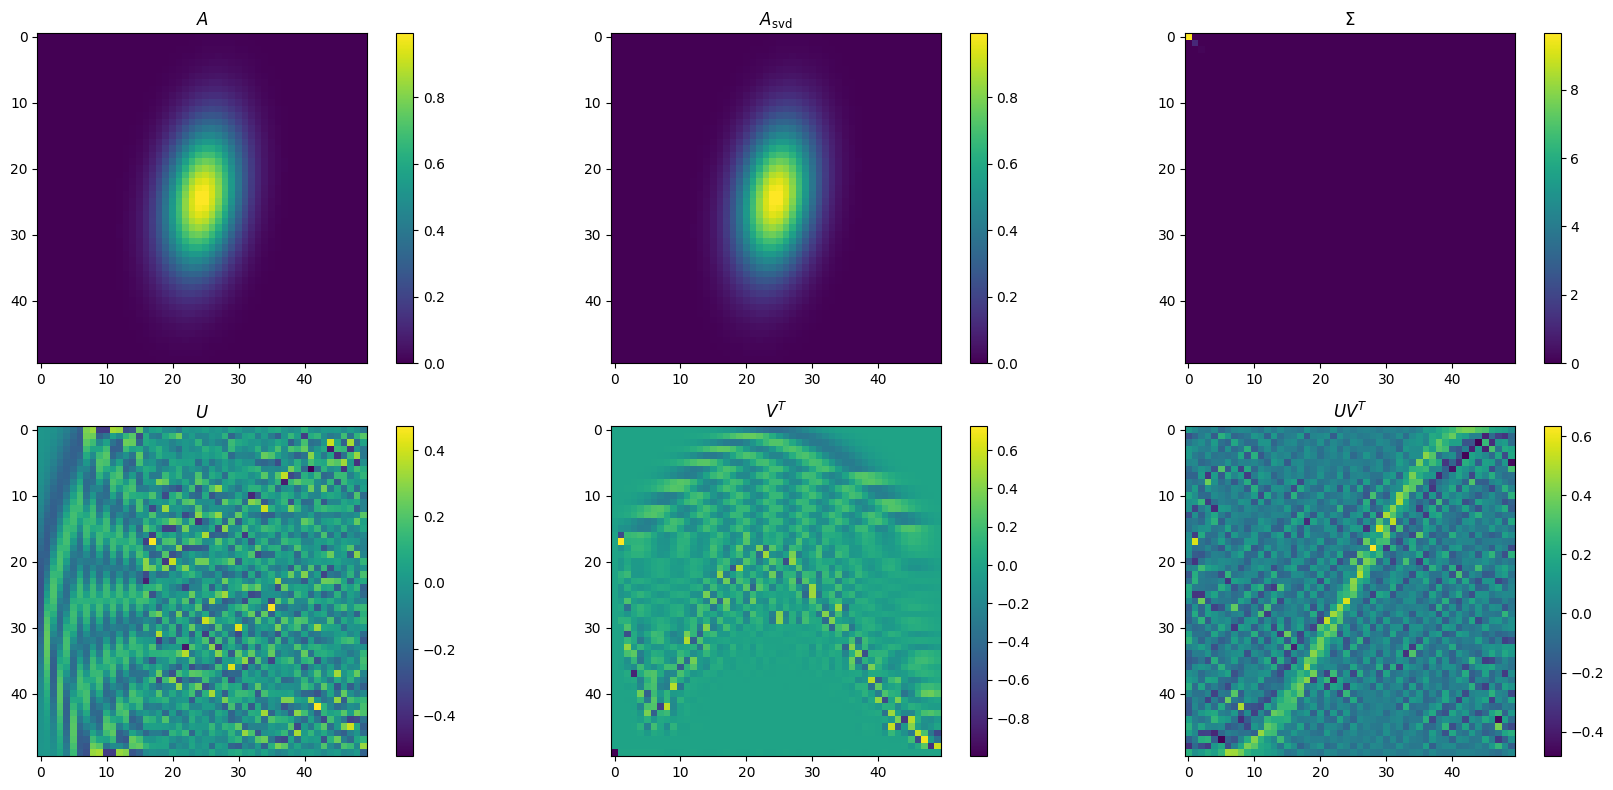

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

matrices = [
    A,        A_svd,   Sigma,
    U,        Vt,      UVt
]

titles = [
    r"$A$",   r"$A_{\mathrm{svd}}$", r"$\Sigma$",
    r"$U$",   r"$V^T$",              r"$U V^T$"
]

for ax, M, title in zip(axes.flat, matrices, titles):
    im = ax.imshow(M, cmap="viridis")
    ax.set_title(title)
    plt.colorbar(im, ax=ax, fraction=0.046)

plt.tight_layout()
plt.show()


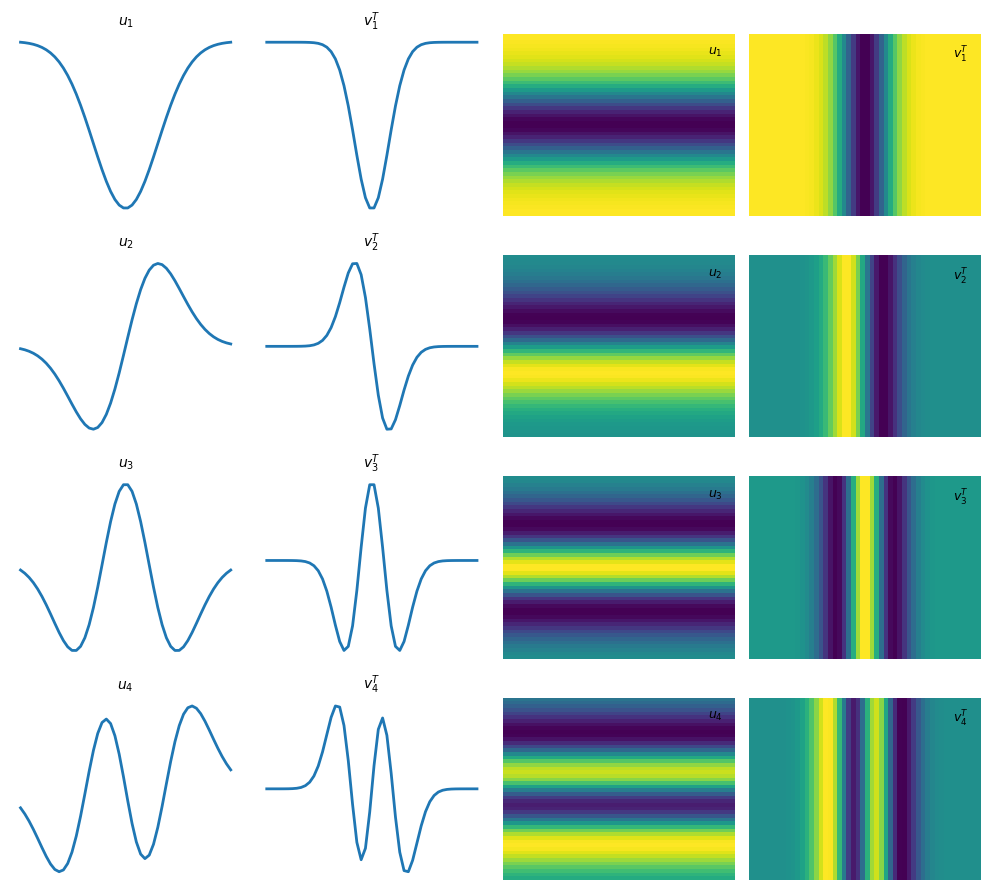

In [12]:
fig, axes = plt.subplots(4, 4, figsize=(10, 9))

for i in range(4):
    # =========================
    # Column 0 — u_i (line plot)
    # =========================
    ax = axes[i, 0]
    ax.axis("off")

    if i < U.shape[1]:
        u = U[:, i]
        ax.plot(u, lw=2)
        ax.set_title(rf"$u_{{{i+1}}}$", fontsize=10)

    # =========================
    # Column 1 — v_i (line plot)
    # =========================
    ax = axes[i, 1]
    ax.axis("off")

    if i < Vt.shape[0]:
        v = Vt[i, :]
        ax.plot(v, lw=2)
        ax.set_title(rf"$v_{{{i+1}}}^T$", fontsize=10)

    # =========================
    # Column 2 — u_i (imshow)
    # =========================
    ax = axes[i, 2]
    ax.axis("off")

    if i < U.shape[1]:
        ax.imshow(u[:, None], cmap="viridis", aspect="auto")

        handle = Patch(
            color="none",
            label=rf"$u_{{{i+1}}}$"
        )
        ax.legend(handles=[handle], loc="upper right",
                  frameon=False, fontsize=9)

    # =========================
    # Column 3 — v_i (imshow)
    # =========================
    ax = axes[i, 3]
    ax.axis("off")

    if i < Vt.shape[0]:
        ax.imshow(v[None, :], cmap="viridis", aspect="auto")

        handle = Patch(
            color="none",
            label=rf"$v_{{{i+1}}}^T$"
        )
        ax.legend(handles=[handle], loc="upper right",
                  frameon=False, fontsize=9)

plt.tight_layout()
plt.show()


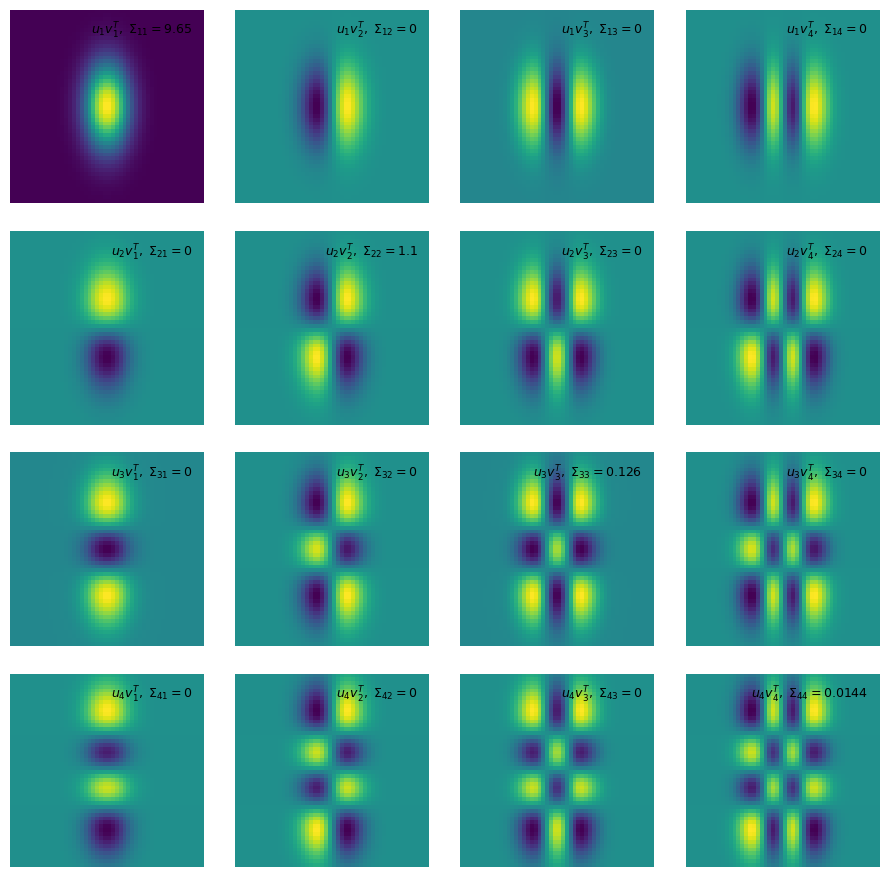

In [14]:
fig, axes = plt.subplots(4, 4, figsize=(9, 9))

for i in range(4):
    for j in range(4):
        ax = axes[i, j]
        ax.axis("off")

        if i < U.shape[1] and j < Vt.shape[0]:
            u = U[:, i]
            v = Vt[j, :]
            uv = np.outer(u, v)
            ax.imshow(uv, cmap="viridis")

            handle = Patch(
                color="none",
                label=rf"$u_{{{i+1}}} v_{{{j+1}}}^T,\;{{\Sigma}}_{{{i+1}{j+1}}}={Sigma[i,j]:.3g}$"
            )


            ax.legend(
                handles=[handle],
                loc="upper right",
                frameon=False,
                fontsize=9
            )

plt.tight_layout()
plt.show()

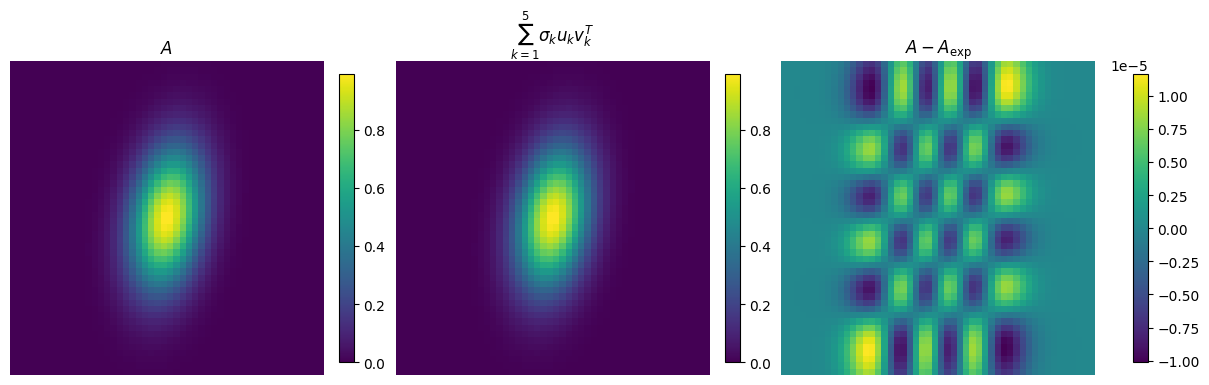

In [15]:
order = 5  # <-- dummy parameter controlling truncation rank

# rank-order SVD expansion
expansion = sum(
    Sigma[k, k] * np.outer(U[:, k], Vt[k, :])
    for k in range(order)
)

diff = A - expansion

fig, axes = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)

im0 = axes[0].imshow(A, cmap="viridis")
axes[0].set_title(r"$A$")
axes[0].axis("off")
fig.colorbar(im0, ax=axes[0], fraction=0.046)

im1 = axes[1].imshow(expansion, cmap="viridis")
axes[1].set_title(
    rf"$\sum_{{k=1}}^{{{order}}} \sigma_k u_k v_k^T$"
)
axes[1].axis("off")
fig.colorbar(im1, ax=axes[1], fraction=0.046)

im2 = axes[2].imshow(diff, cmap="viridis")
axes[2].set_title(r"$A - A_{\mathrm{exp}}$")
axes[2].axis("off")
fig.colorbar(im2, ax=axes[2], fraction=0.046)

plt.show()
